In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./transaction_data.csv')
df.head()

Transaction ID Sender Account ID Receiver Account ID  Transaction Amount  \
0  TXN9520068950          ACC14994            ACC16656              495.90   
1  TXN9412011085          ACC58958            ACC32826              529.62   
2  TXN4407425052          ACC56321            ACC92481              862.47   
3  TXN2214150284          ACC48650            ACC76457             1129.88   
4  TXN4247571145          ACC60921            ACC11419              933.24   

  Transaction Type            Timestamp Transaction Status  Fraud Flag  \
0          Deposit  2025-01-17 10:14:00             Failed        True   
1       Withdrawal  2025-01-17 10:51:00            Success       False   
2       Withdrawal  2025-01-17 10:50:00             Failed       False   
3         Transfer  2025-01-17 10:56:00            Success        True   
4          Deposit  2025-01-17 10:25:00            Success        True   

  Geolocation (Latitude/Longitude) Device Used Network Slice ID  Latency (ms)  \
0             34.0522 N, -74.006 W     Desktop           Slice3            10   
1           35.6895 N, -118.2437 W      Mobile           Slice2            11   
2              48.8566 N, 2.3522 W      Mobile           Slice1             4   
3             34.0522 N, -74.006 W      Mobile           Slice3            10   
4             55.7558 N, 37.6173 W      Mobile           Slice3            20   

   Slice Bandwidth (Mbps)  PIN Code  
0                     179      3075  
1                      89      2369  
2                      53      8039  
3                     127      6374  
4                     191      8375

In [4]:
df_column_names = df.columns
print(df_column_names)

Index(['Transaction ID', 'Sender Account ID', 'Receiver Account ID',
       'Transaction Amount', 'Transaction Type', 'Timestamp',
       'Transaction Status', 'Fraud Flag', 'Geolocation (Latitude/Longitude)',
       'Device Used', 'Network Slice ID', 'Latency (ms)',
       'Slice Bandwidth (Mbps)', 'PIN Code'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction ID                    1000 non-null   object 
 1   Sender Account ID                 1000 non-null   object 
 2   Receiver Account ID               1000 non-null   object 
 3   Transaction Amount                1000 non-null   float64
 4   Transaction Type                  1000 non-null   object 
 5   Timestamp                         1000 non-null   object 
 6   Transaction Status                1000 non-null   object 
 7   Fraud Flag                        1000 non-null   bool   
 8   Geolocation (Latitude/Longitude)  1000 non-null   object 
 9   Device Used                       1000 non-null   object 
 10  Network Slice ID                  1000 non-null   object 
 11  Latency (ms)                      1000 non-null   int64  
 12  Slice B

In [7]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df.describe()

Transaction Amount  Latency (ms)  Slice Bandwidth (Mbps)    PIN Code
count          1000.00000   1000.000000              1000.00000  1000.00000
mean            771.16529     11.688000               148.51100  5458.66600
std             411.01925      5.131958                57.78634  2603.03646
min              51.89000      3.000000                50.00000  1000.00000
25%             423.34750      7.000000                98.00000  3281.75000
50%             761.65500     12.000000               148.00000  5385.50000
75%            1122.67250     16.000000               198.25000  7535.00000
max            1497.76000     20.000000               250.00000  9999.00000

In [8]:
df['Timestamp'] = df['Timestamp'].dt.minute

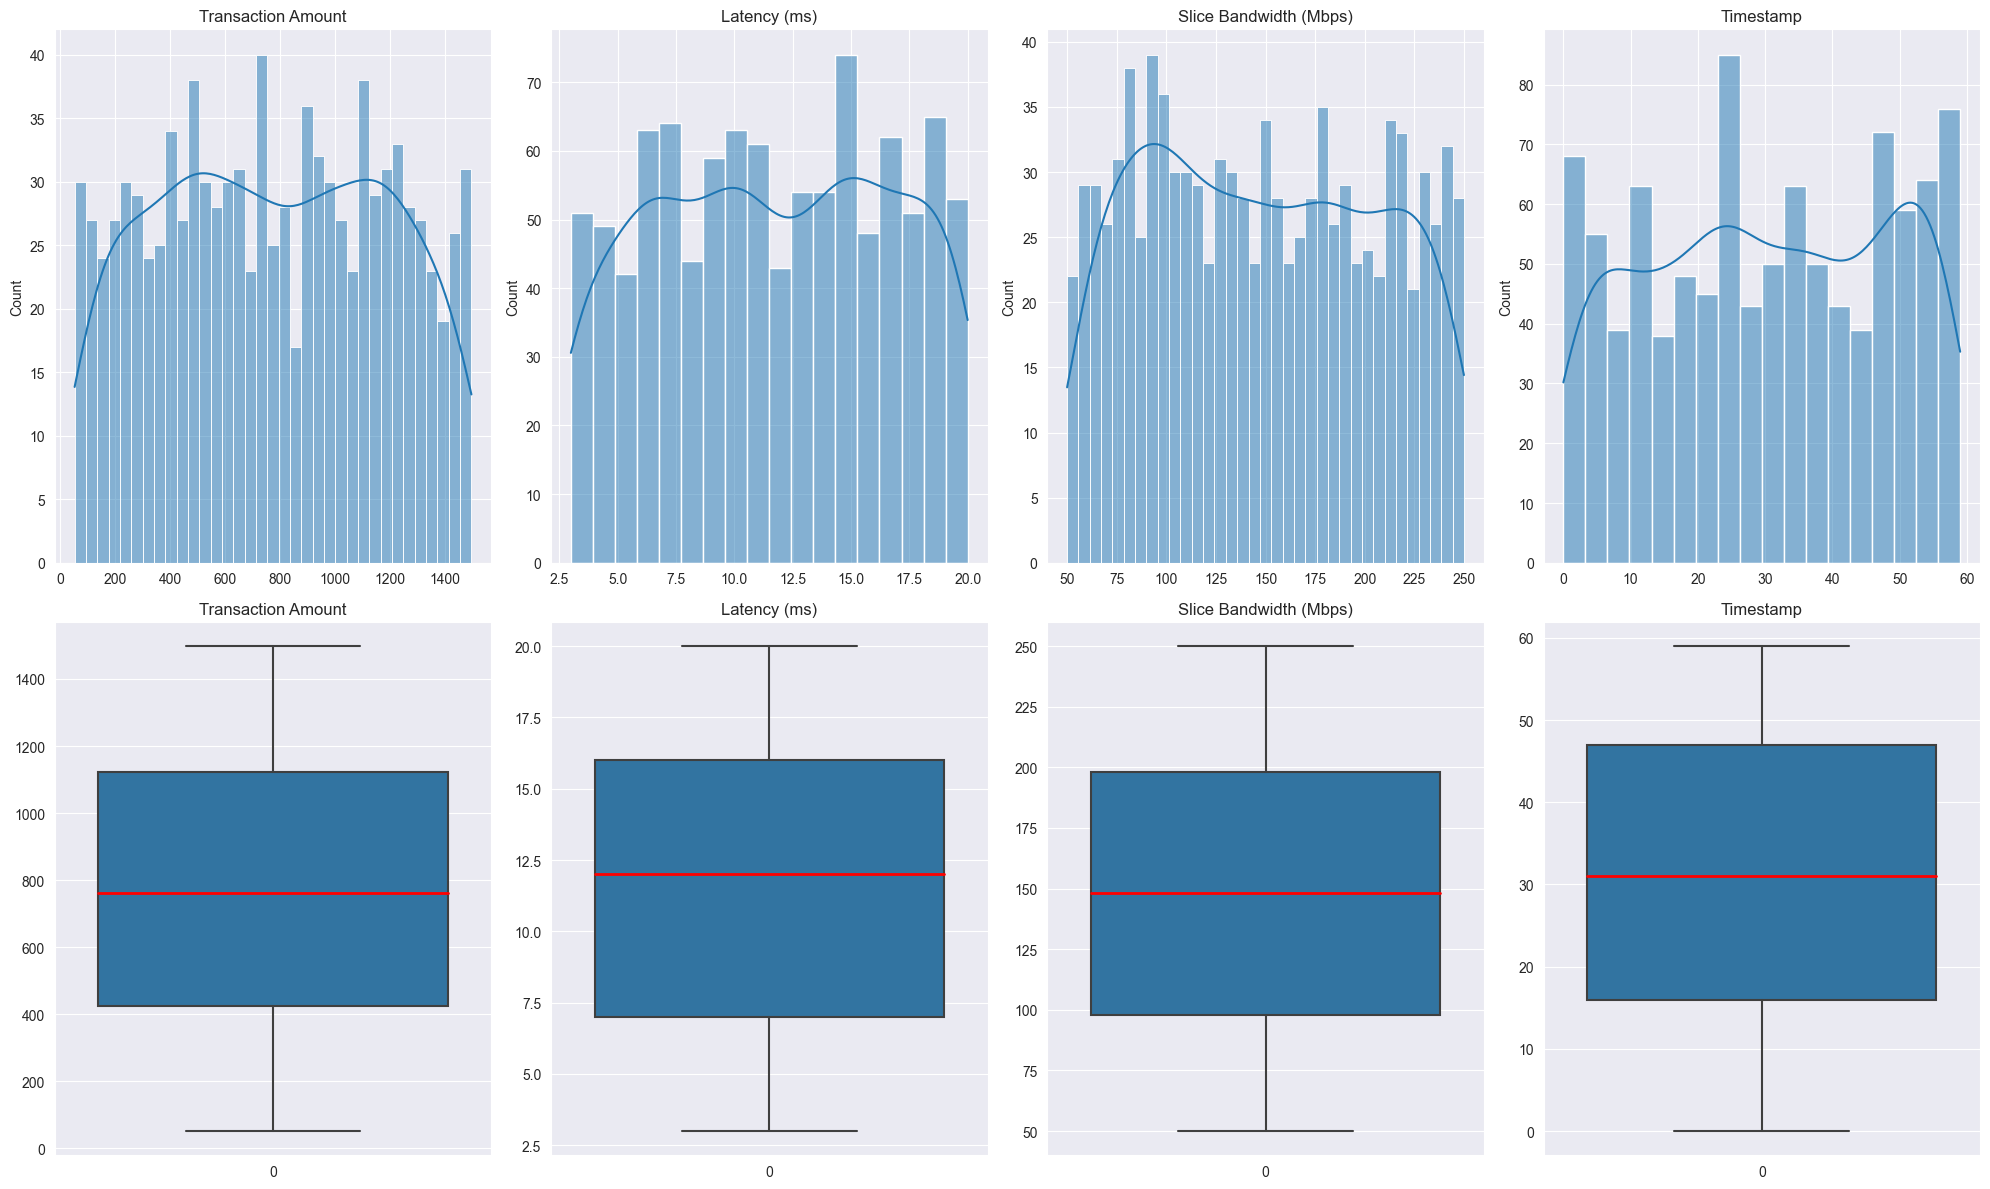

In [9]:
cols = ["Transaction Amount","Latency (ms)", "Slice Bandwidth (Mbps)", "Timestamp"]
fig, axes = plt.subplots(2, len(cols), figsize=(20, 12))

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, ax=axes[0, i], bins = (18 if col in ["Latency (ms)", "Timestamp"] else 35), kde = True)
    axes[0, i].set_title(col)
    axes[0, i].set_xlabel("")

for i, col in enumerate(cols):
    try:
        # Plot the boxplot on the second row of the grid
        sns.boxplot(data=df[col], ax=axes[1, i], medianprops={"color": "r", "linewidth": 2})
        axes[1, i].set_title(col)
        axes[1, i].set_xlabel("")
    except TypeError:
        print(f"Can't BoxPlot the {col} column because it's not numeric.")

plt.tight_layout()
plt.show()

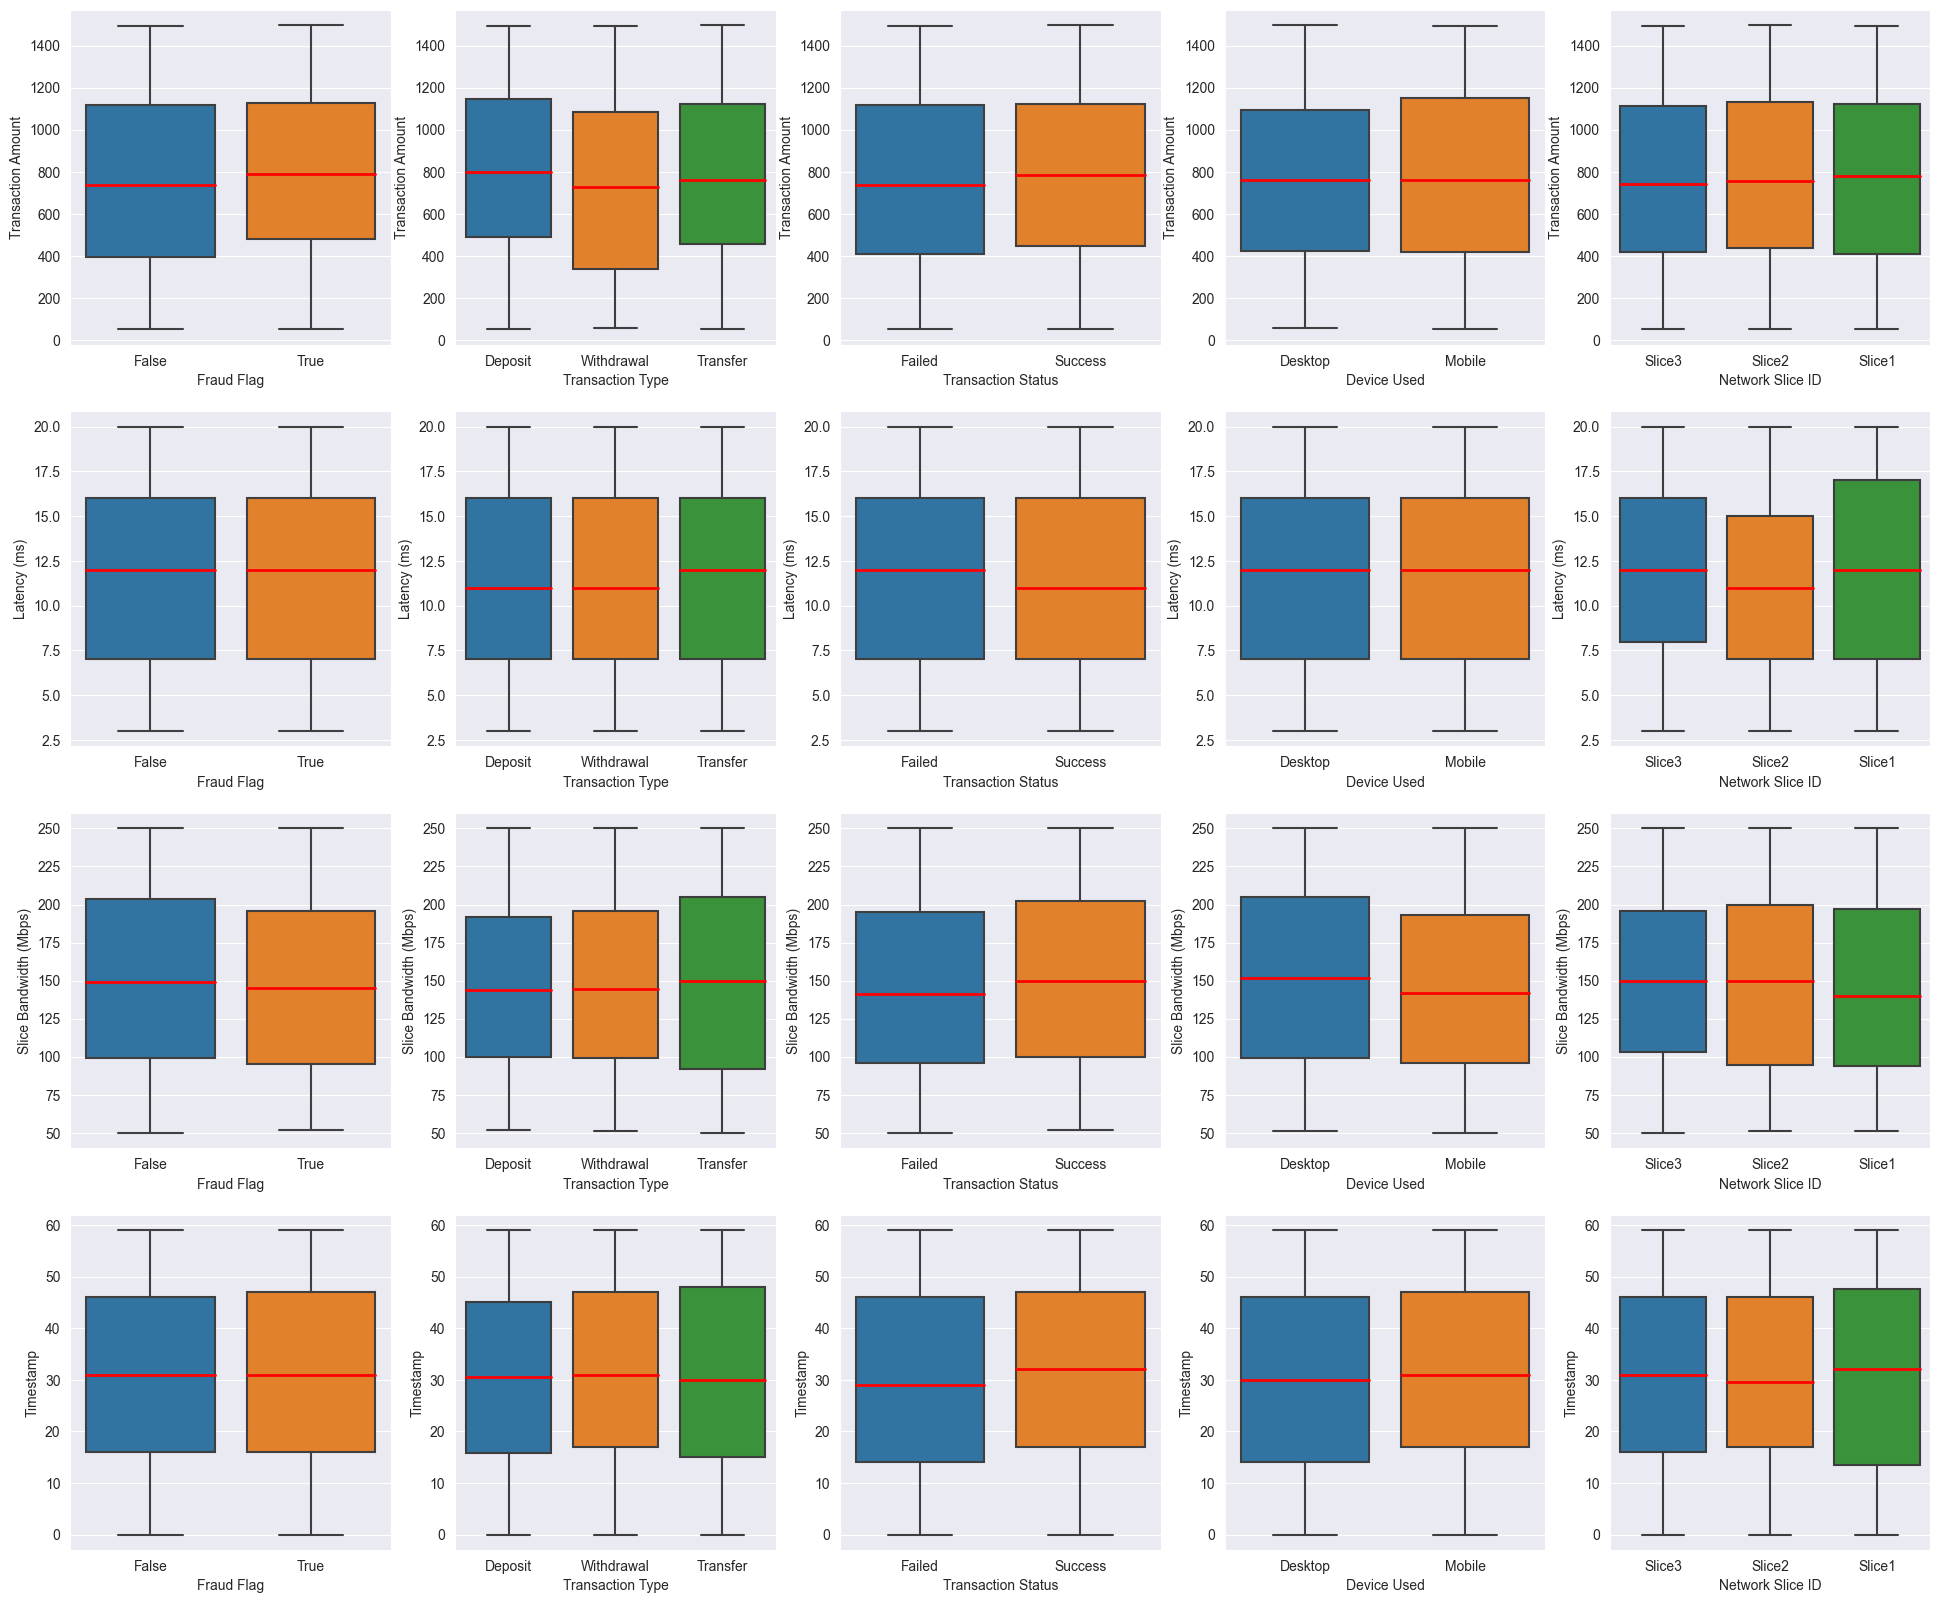

In [10]:
object_cols = ['Fraud Flag', 'Transaction Type', 'Transaction Status', 'Device Used', 'Network Slice ID']
cols = ["Transaction Amount","Latency (ms)", "Slice Bandwidth (Mbps)", "Timestamp"]
n,m = len(cols), len(object_cols)
fig, axes = plt.subplots(n, m , figsize=(6*n, 4*m))

for i, col in enumerate(cols):
    for j, col_obj in enumerate(object_cols):
        try:
            sns.boxplot(data=df, x = col_obj, y = col, ax=axes[i, j], medianprops={"color": "r", "linewidth": 2})
            axes[i, j].set_xlabel(col_obj)
        except TypeError:
            print(f"Can't BoxPlot the {col} column because it's not numeric.")

False    519
True     481
Name: Fraud Flag, dtype: int64


<Axes: ylabel='Fraud Flag'>

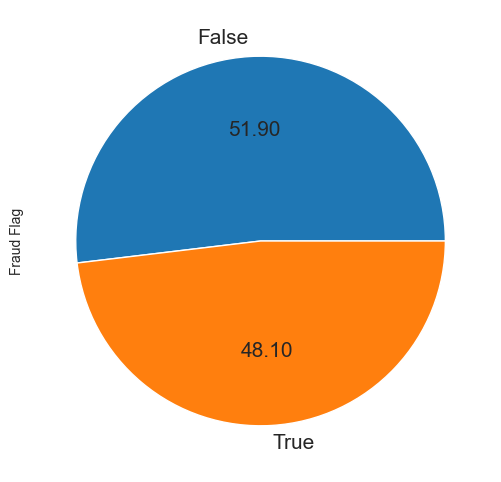

In [12]:
print(df["Fraud Flag"].value_counts())
df["Fraud Flag"].value_counts().plot.pie(
    autopct="%.2f",
    fontsize=15,
    figsize=(6, 6)
)

In [13]:
from scipy.stats import shapiro, normaltest

df_fraud = df[df['Fraud Flag'] == True]
df_non_fraud = df[df['Fraud Flag'] == False]
stat_f, p_f = shapiro(df_fraud['Transaction Amount'])
print(f"Fraudulent Transactions -> Shapiro: stat={stat_f:.4f}, p={p_f:.4f}")
stat_nf, p_nf = shapiro(df_non_fraud['Transaction Amount'])
print(f"Non-Fraudulent Transactions -> Shapiro: stat={stat_nf:.4f}, p={p_nf:.4f}")

Fraudulent Transactions -> Shapiro: stat=0.9625, p=0.0000
Non-Fraudulent Transactions -> Shapiro: stat=0.9542, p=0.0000


In [15]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(df_fraud['Transaction Amount'],
                          df_non_fraud['Transaction Amount'],
                          equal_var=False)
var_fraud = df_fraud['Transaction Amount'].var()
var_non_fraud = df_non_fraud['Transaction Amount'].var()

print(f"Variance of Fraudulent Transactions: {var_fraud:.2f} vs Variance of Non-Fraudulent Transactions: {var_non_fraud:.2f}.")
print(f"T-test: t={t_stat:.4f}, p={p_val:.4f}")

Variance of Fraudulent Transactions: 159232.73 vs Variance of Non-Fraudulent Transactions: 177768.45.
T-test: t=1.2245, p=0.2211


In [16]:
from scipy.stats import mannwhitneyu

u_stat, p_val = mannwhitneyu(df_fraud['Transaction Amount'],
                             df_non_fraud['Transaction Amount'],
                             alternative='two-sided')

print(f"Mann-Whitney U: stat={u_stat:.4f}, p={p_val:.4f}")

Mann-Whitney U: stat=130520.5000, p=0.2116


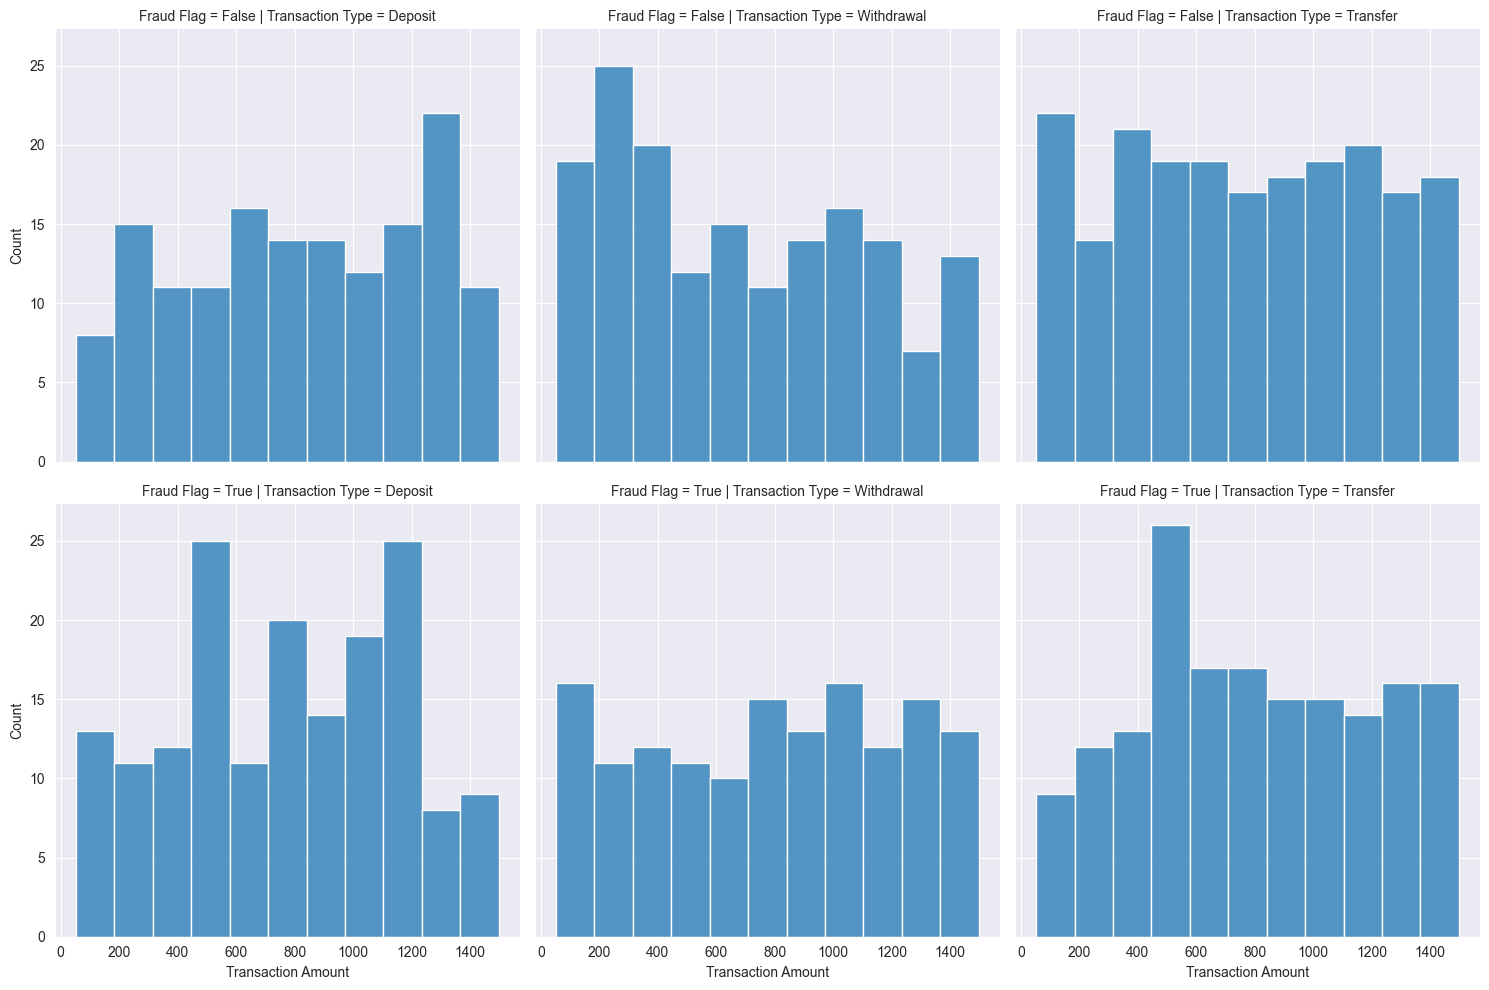

In [17]:
sns.displot(
    df, x = "Transaction Amount", col = "Transaction Type", row = "Fraud Flag"
)

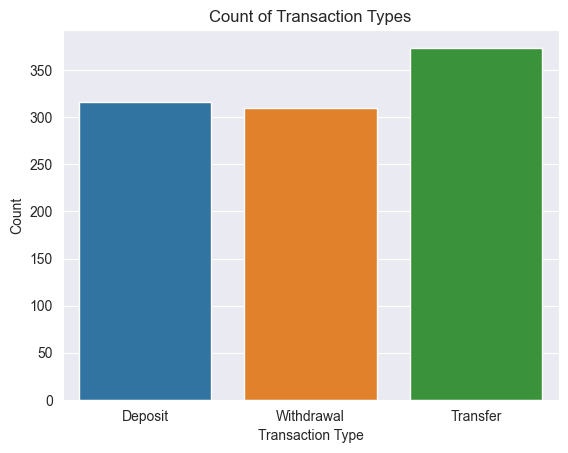

In [18]:
sns.countplot(x='Transaction Type', data=df)
plt.title('Count of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

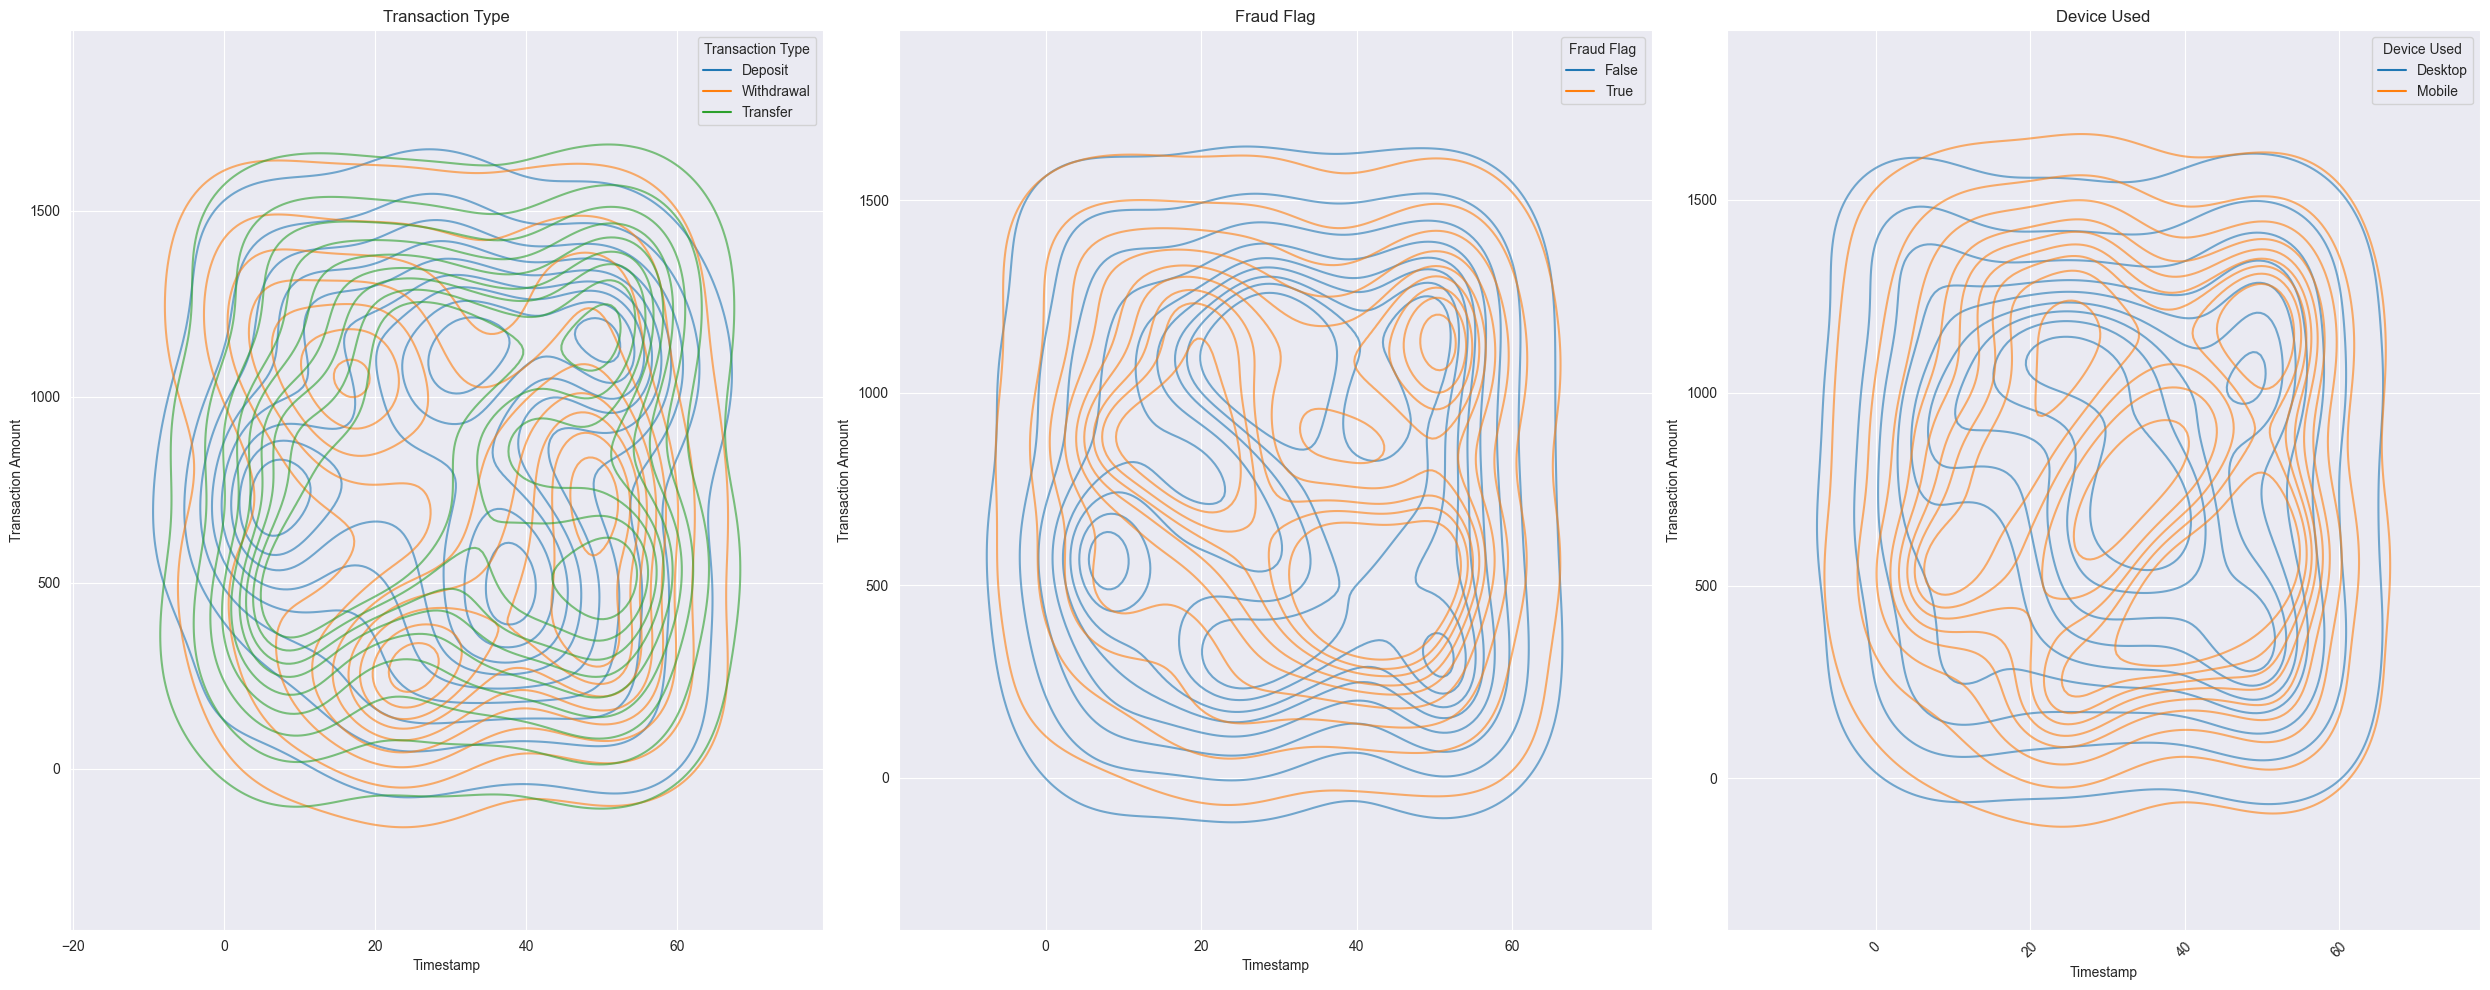

In [19]:
coluns = ["Transaction Type", "Fraud Flag", "Device Used"]
fig, axes = plt.subplots(1, len(coluns), figsize=(25, 10))

for i, hue in enumerate(coluns):
    sns.kdeplot(
        data=df,
        x="Timestamp",
        y="Transaction Amount",
        hue=hue,
        ax=axes[i],
        fill=False,
        alpha=0.6
    )
    axes[i].set_title(hue)
    axes[i].set_xlabel("Timestamp")
    axes[i].set_ylabel("Transaction Amount")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

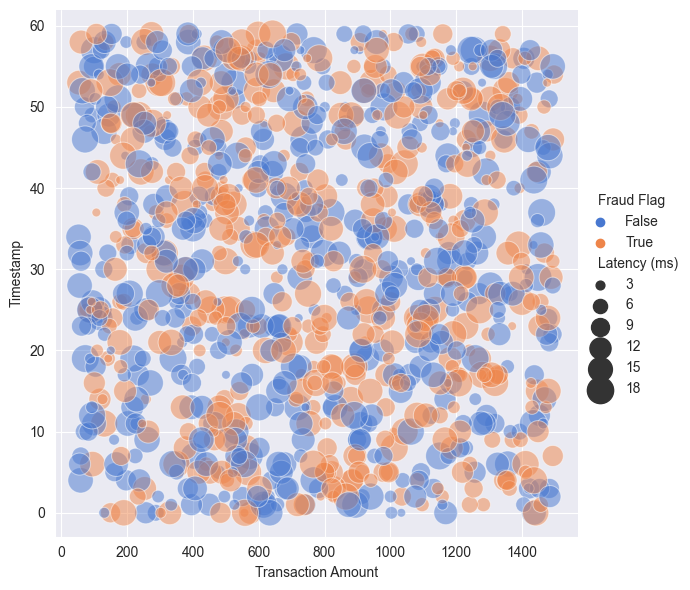

In [20]:
sns.relplot(
    data = df, x="Transaction Amount", y="Timestamp", hue="Fraud Flag", size = "Latency (ms)",
    sizes=(40, 400), alpha=.5, palette="muted",
    height=6
)

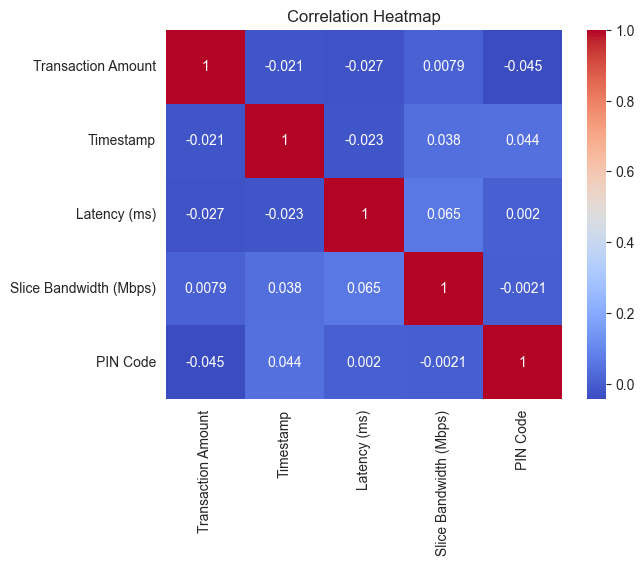

In [21]:
df_num = df.select_dtypes(include=[np.number])
correlation_matrix = df_num.corr(method="spearman")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

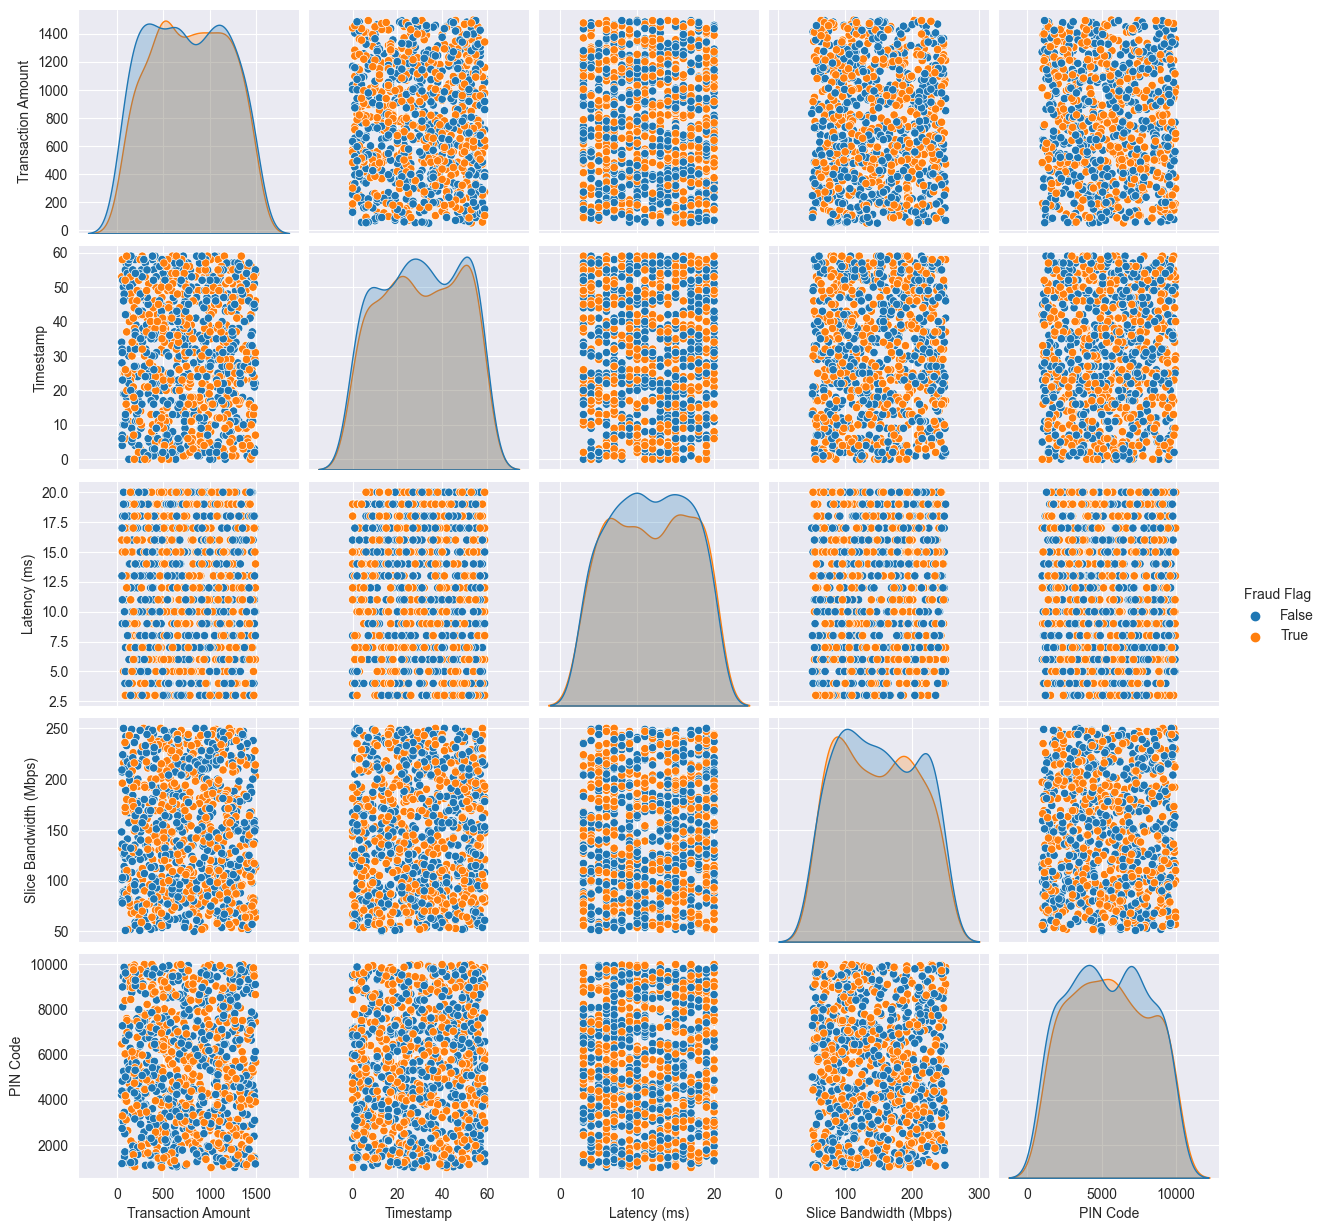

In [22]:
fig = sns.pairplot(data=df, hue = "Fraud Flag")
fig

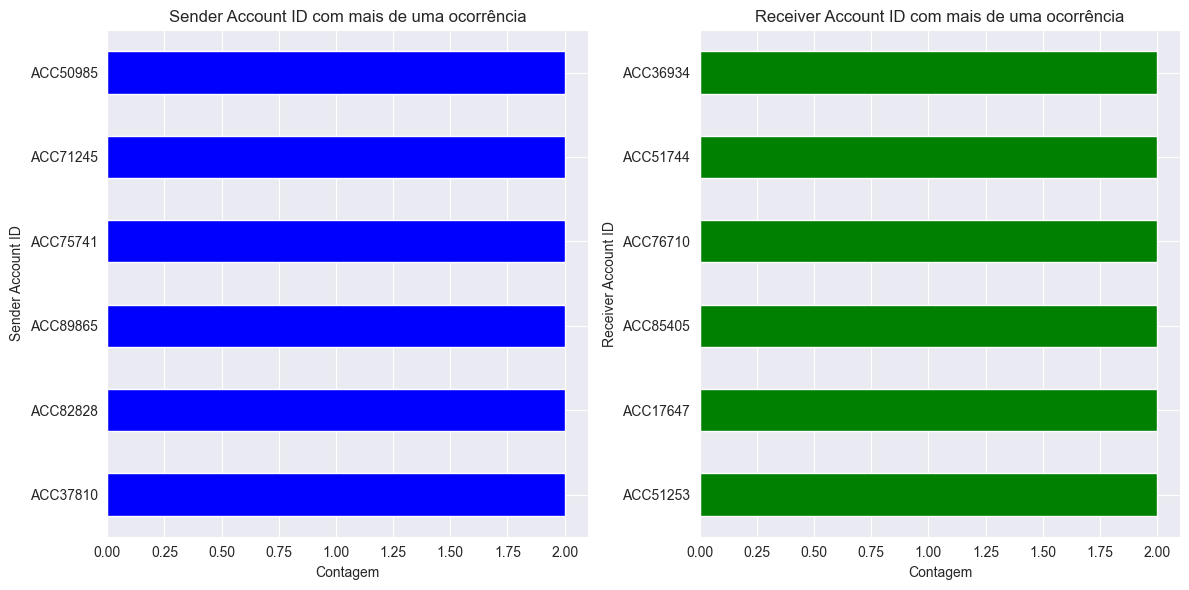

In [23]:
sender_counts = df["Sender Account ID"].value_counts()
receiver_counts = df["Receiver Account ID"].value_counts()

sender_counts_filtered = sender_counts[sender_counts > 1]
receiver_counts_filtered = receiver_counts[receiver_counts > 1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sender_counts_filtered.plot(kind='barh', ax=ax1, color='blue')
ax1.set_title('Sender Account ID com mais de uma ocorrência')
ax1.set_xlabel('Contagem')
ax1.set_ylabel('Sender Account ID')

receiver_counts_filtered.plot(kind='barh', ax=ax2, color='green')
ax2.set_title('Receiver Account ID com mais de uma ocorrência')
ax2.set_xlabel('Contagem')
ax2.set_ylabel('Receiver Account ID')

plt.tight_layout()
plt.show()